In [1]:
import pycaret
import pandas as pd

In [2]:
data = pd.read_csv("data/lead_scoring_cleared.csv")

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost
import numpy as np
import matplotlib.pylab as pl
import shap
import joblib


from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from sklearn.metrics import auc,roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

In [4]:
data

,prospect_id,lead_number,converted,total_visits,total_time_spent_on_website,page_views_per_visit,lead_origin,lead_source,last_activity,country,specialization,how_did_you_hear_about_x_education,occupation,what_matters_most_to_you_in_choosing_a_course,city,last_notable_activity,free_copy,do_not_email,do_not_call
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.00,api,olark_chat,page_visited_on_website,unknown,unknown,select,unemployed,better_career_prospects,select,modified,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.50,api,organic_search,email_opened,india,unknown,select,unemployed,better_career_prospects,select,email_opened,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.00,landing_page_submission,direct_traffic,email_opened,india,business_administration,select,others,better_career_prospects,mumbai,email_opened,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.00,landing_page_submission,direct_traffic,others,india,others,word_of_mouth,unemployed,better_career_prospects,mumbai,modified,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.00,landing_page_submission,google,converted_to_lead,india,unknown,others,unemployed,better_career_prospects,mumbai,modified,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,8.0,1845,2.67,landing_page_submission,direct_traffic,others,others,it_projects_management,select,unemployed,better_career_prospects,mumbai,others,0,1,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,0,2.0,238,2.00,landing_page_submission,direct_traffic,sms_sent,india,others,select,unemployed,better_career_prospects,mumbai,sms_sent,1,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0,2.0,199,2.00,landing_page_submission,direct_traffic,sms_sent,india,business_administration,select,unemployed,better_career_prospects,mumbai,sms_sent,1,1,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,3.0,499,3.00,landing_page_submission,google,sms_sent,india,human_resource_management,online_search,unknown,unknown,other_metro_cities,sms_sent,0,0,0


In [5]:
categorical_features = ['lead_origin',
       'lead_source', 'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'city',
       'last_notable_activity']

numerical_features = ['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']

In [6]:
dummy = pd.get_dummies(data[categorical_features])
dummy

,lead_origin_api,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_others,lead_source_direct_traffic,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,...,city_other_metro_cities,city_others,city_select,city_thane_and_outskirts,city_unknown,last_notable_activity_email_opened,last_notable_activity_modified,last_notable_activity_others,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9238,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [7]:
X = pd.concat([data.drop(categorical_features + ['prospect_id', 'lead_number', 'converted'], axis=1), dummy], axis=1)
y = data.converted

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [9]:
X

,total_visits,total_time_spent_on_website,page_views_per_visit,free_copy,do_not_email,do_not_call,lead_origin_api,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_others,...,city_other_metro_cities,city_others,city_select,city_thane_and_outskirts,city_unknown,last_notable_activity_email_opened,last_notable_activity_modified,last_notable_activity_others,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent
0,0.0,0,0.00,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.50,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,2.0,238,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,2.0,199,2.00,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9238,3.0,499,3.00,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [10]:
sc = StandardScaler()
X_train_normalizado = sc.fit_transform(X_train[numerical_features])

In [11]:
X_train[numerical_features] = X_train_normalizado

In [12]:
X_train

,total_visits,total_time_spent_on_website,page_views_per_visit,free_copy,do_not_email,do_not_call,lead_origin_api,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_others,...,city_other_metro_cities,city_others,city_select,city_thane_and_outskirts,city_unknown,last_notable_activity_email_opened,last_notable_activity_modified,last_notable_activity_others,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent
2593,1.081131,0.690514,0.969209,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1803,-0.290939,1.563217,-0.638011,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4057,-0.682959,-0.889442,-1.097217,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
8949,0.493101,-0.596723,-0.408409,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4015,-0.094929,-0.698538,0.280400,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,-0.682959,-0.889442,-1.097217,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3714,0.297091,1.092321,1.198812,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7409,0.297091,1.455947,-0.330344,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3325,-0.682959,-0.889442,-1.097217,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
X_test_normalizado = sc.transform(X_test[numerical_features])

In [14]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [15]:
#X_train_normalizado

In [16]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)

[0]	test-logloss:0.66620
[100]	test-logloss:0.58577
[142]	test-logloss:0.58930


<Figure size 1000x2000 with 0 Axes>

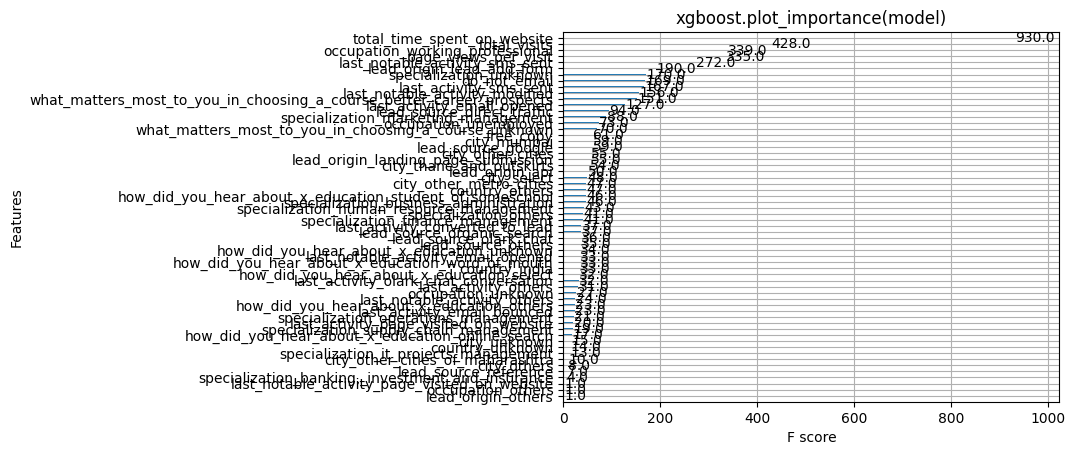

In [17]:
pl.figure(figsize=(10, 20))
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values( X_train)

In [19]:
X_train

,total_visits,total_time_spent_on_website,page_views_per_visit,free_copy,do_not_email,do_not_call,lead_origin_api,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_others,...,city_other_metro_cities,city_others,city_select,city_thane_and_outskirts,city_unknown,last_notable_activity_email_opened,last_notable_activity_modified,last_notable_activity_others,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent
2593,1.081131,0.690514,0.969209,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1803,-0.290939,1.563217,-0.638011,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4057,-0.682959,-0.889442,-1.097217,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
8949,0.493101,-0.596723,-0.408409,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4015,-0.094929,-0.698538,0.280400,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,-0.682959,-0.889442,-1.097217,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3714,0.297091,1.092321,1.198812,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7409,0.297091,1.455947,-0.330344,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3325,-0.682959,-0.889442,-1.097217,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


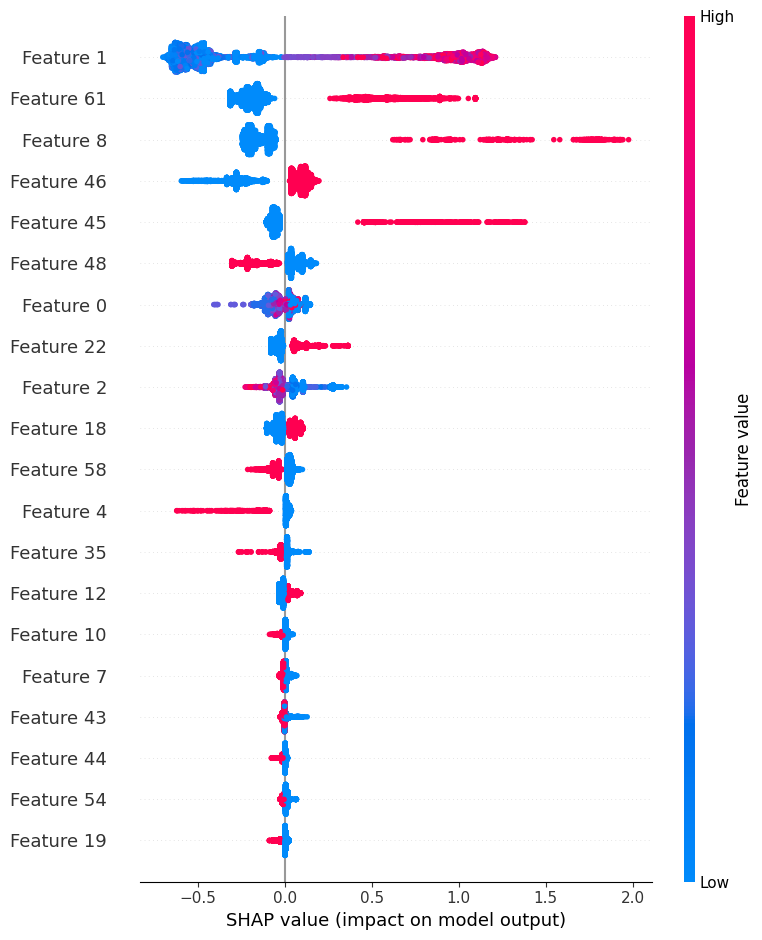

In [20]:
shap.summary_plot(shap_values, X_train.to_numpy())

In [21]:
X_train_selected = X_train[X_train.columns[[1, 61, 8, 46, 45, 48, 0, 22, 2, 18, 58, 4, 35, 12, 10]]]

X_test_selected = X_test[X_test.columns[[1, 61, 8, 46, 45, 48, 0, 22, 2, 18, 58, 4, 35, 12, 10]]]

In [22]:
# variáveis utilizadas

X_train.columns[[1, 61, 8, 46, 45, 48, 0, 22, 2, 18, 58, 4, 35, 12, 10]]

Index(['total_time_spent_on_website', 'last_notable_activity_sms_sent',
       'lead_origin_lead_add_form',
       'what_matters_most_to_you_in_choosing_a_course_better_career_prospects',
       'occupation_working_professional',
       'what_matters_most_to_you_in_choosing_a_course_unknown', 'total_visits',
       'last_activity_sms_sent', 'page_views_per_visit',
       'last_activity_email_opened', 'last_notable_activity_modified',
       'do_not_email', 'specialization_unknown', 'lead_source_olark_chat',
       'lead_source_direct_traffic'],
      dtype='object')

In [23]:
X_train_selected.to_csv("example_data.csv", index=False)

In [24]:
model = RandomForestClassifier() 
model.fit(X_train_selected, y_train) 
  
y_pred = model.predict(X_test_selected) 
  
print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       973
           1       0.70      0.57      0.63       875

    accuracy                           0.68      1848
   macro avg       0.68      0.68      0.68      1848
weighted avg       0.68      0.68      0.68      1848



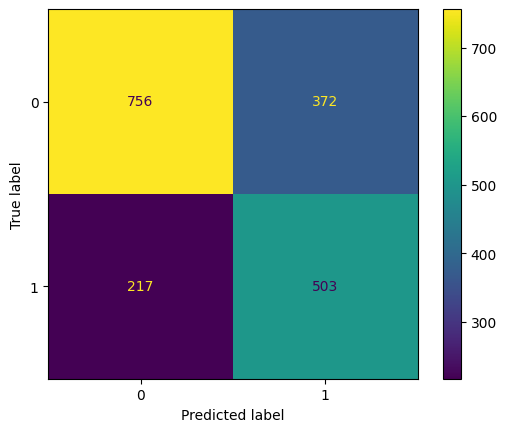

In [25]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [26]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [27]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train_selected, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [28]:
model_tuned = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 
model_tuned.fit(X_train_selected, y_train) 
y_pred_grid = model_tuned.predict(X_test_selected) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       733
           1       0.85      0.55      0.66      1115

    accuracy                           0.67      1848
   macro avg       0.70      0.70      0.67      1848
weighted avg       0.73      0.67      0.67      1848



In [29]:
# columns used

X_train.columns[[1, 61, 8, 46, 45, 48, 0, 22, 2, 18, 58, 4, 35, 12, 10]]

Index(['total_time_spent_on_website', 'last_notable_activity_sms_sent',
       'lead_origin_lead_add_form',
       'what_matters_most_to_you_in_choosing_a_course_better_career_prospects',
       'occupation_working_professional',
       'what_matters_most_to_you_in_choosing_a_course_unknown', 'total_visits',
       'last_activity_sms_sent', 'page_views_per_visit',
       'last_activity_email_opened', 'last_notable_activity_modified',
       'do_not_email', 'specialization_unknown', 'lead_source_olark_chat',
       'lead_source_direct_traffic'],
      dtype='object')

In [30]:
# example payload
X_train_selected.iloc[0].to_dict()

{'total_time_spent_on_website': 0.6905137223688044,
 'last_notable_activity_sms_sent': 1.0,
 'lead_origin_lead_add_form': 0.0,
 'what_matters_most_to_you_in_choosing_a_course_better_career_prospects': 0.0,
 'occupation_working_professional': 0.0,
 'what_matters_most_to_you_in_choosing_a_course_unknown': 1.0,
 'total_visits': 1.081130948907635,
 'last_activity_sms_sent': 1.0,
 'page_views_per_visit': 0.9692089948770727,
 'last_activity_email_opened': 0.0,
 'last_notable_activity_modified': 0.0,
 'do_not_email': 0.0,
 'specialization_unknown': 0.0,
 'lead_source_olark_chat': 0.0,
 'lead_source_direct_traffic': 0.0}

In [31]:
y_train_pred_grid = y_train
y_train_pred_grid_proba = model_tuned.predict_proba(X_train_selected)[:, 1]

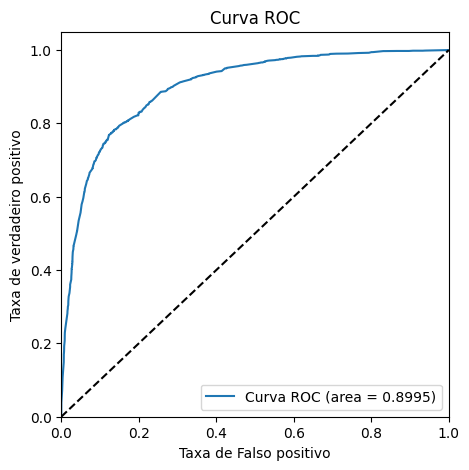

In [32]:
fpr, tpr, thresholds = roc_curve(y_train_pred_grid, y_train_pred_grid_proba, drop_intermediate = False )
auc_score = roc_auc_score(y_train_pred_grid, y_train_pred_grid_proba)


plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='Curva ROC (area = %0.4f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
joblib.dump(sc, "standard_scaler.z")

['standard_scaler.z']

In [34]:
joblib.dump(model_tuned, "model.z")

['model.z']